# Training

In [9]:
# This file will train the models.
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import pickle

from statistics import multimode
from cmath import nan
import numpy as np


import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)


### Functions

In [10]:
def save_model(model,name):
    filename = 'DATA/models/'+ name
    # Save the model. 
    pickle.dump(model, open(filename, 'wb')) 
def load_model(name):
    filename = 'DATA/models/'+ name 
    model = pickle.load(open(filename, 'rb'))
    return(model)

In [11]:
def logistic_regression(training):
    X_train,X_test,y_train,y_test = train_test_split(training.drop(['Protest','place', 'grievances', 'triggers', 'tactics', 'actors', 'locations', 'weapons', 'eventualities', 'curiosities', 'non_protests', 'universities'],axis = 1), training['Protest'],test_size = 0.3,random_state=7)
    # training the model
    logreg =  LogisticRegression(solver='lbfgs')
    logreg.fit(X_train,y_train)
    score = logreg.score(X_test,y_test)
    return(logreg,score)
def niave(training):
    X_train,X_test,y_train,y_test = train_test_split(training.drop(['Protest','place', 'grievances', 'triggers', 'tactics', 'actors', 'locations', 'weapons', 'eventualities', 'curiosities', 'non_protests', 'universities'],axis = 1), training['Protest'],test_size = 0.2)
    naive = GaussianNB()
    naive.fit(X_train,y_train)
    score = naive.score(X_test,y_test)
    return(naive,score)
def linearSVM(training):
    from sklearn.svm import LinearSVC
    X_train,X_test,y_train,y_test = train_test_split(training.drop(['Protest','place', 'grievances', 'triggers', 'tactics', 'actors', 'locations', 'weapons', 'eventualities', 'curiosities', 'non_protests', 'universities'],axis = 1), training['Protest'],test_size = 0.2)
    svm = LinearSVC()
    svm.fit(X_train,y_train)
    score = svm.score(X_test,y_test)
    return(svm,score)

### Main

In [12]:
### Main
training = pd.read_csv('DATA/training_data.csv')
training = training.drop('Unnamed: 0', axis = 1)
training.head(1)

(LogisticRegression(), 0.7666666666666667)
(GaussianNB(), 0.675)
(LinearSVC(), 0.575)


c:\Users\papag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Looking at the feature dynamics

In [13]:
# Data visualisation Tool
def charts(feature, df):
    print('\n           ____________________________ Plots of', feature, 'per Protest and noProtest: ____________________________')
    # Pie of all Data
    fig = plt.figure(figsize=(20,5))
    f1 = fig.add_subplot(131)
    cnt = df[feature].value_counts()
    g = plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%', shadow=True, startangle=90)
    
    # Count Plot By Protest and noProtest
    f = fig.add_subplot(132)
    g = sns.countplot(x=feature, hue='Protest', hue_order=[1,0], data=df, ax=f)

    # Percent stacked Plot
    Protest = df[df['Protest']==1][feature].value_counts()
    noProtest = df[df['Protest']==0][feature].value_counts()
    df2 = pd.DataFrame([Protest,noProtest])
    df2.index = ['Protest','noProtest']
    df2 = df2.T
    df2 = df2.fillna(0)
    df2['Total'] = df2.Protest + df2.noProtest
    df2.Protest = df2.Protest/df2.Total
    df2.noProtest = df2.noProtest/df2.Total
    df2.drop(['Total'], axis=1, inplace=True)
    f = fig.add_subplot(133)
    df2.plot(kind='bar', stacked=True, ax=f)
    del df2, g, f, cnt, noProtest, fig

In [14]:
len(training)

198

### Number of Tweets Analysis

In [15]:
training = training.loc[((training['Protest']== 1) & (training['NuTweets'] > 20) )| (training['Protest']==0)]


In [16]:
NuTweets = training["NuTweets"]

In [17]:
bins = []
for i in range(0,200,20):
    bins.append(i)
for i in range(200,max(NuTweets),1000):
    bins.append(i)


           ____________________________ Plots of BinTweets per Protest and noProtest: ____________________________


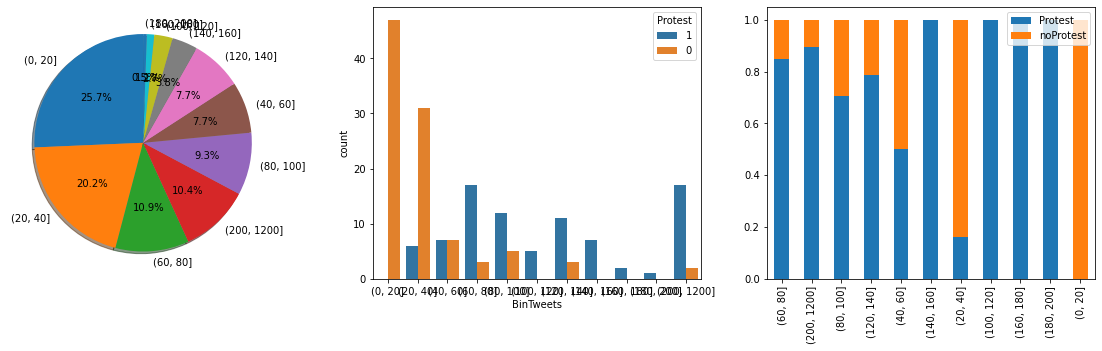

In [18]:
training['BinTweets'] = pd.cut(training['NuTweets'],bins)
charts('BinTweets',training)

### Tweet Rate Analysis


           ____________________________ Plots of Bin_d1 per Protest and noProtest: ____________________________


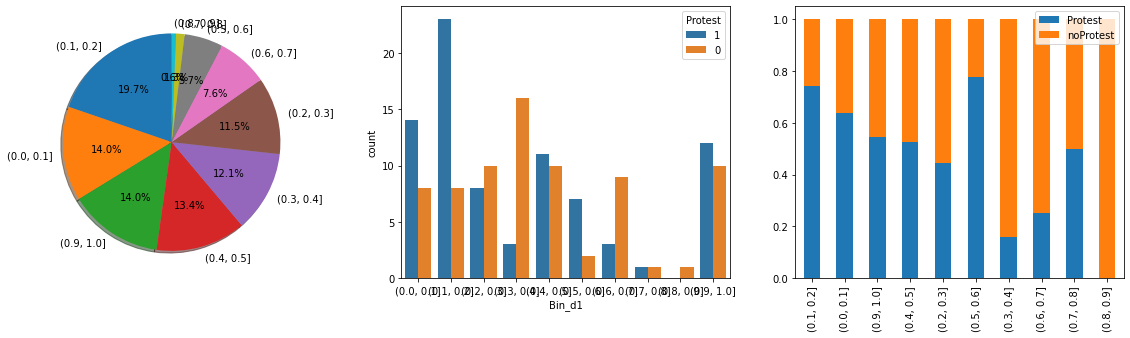

In [19]:
bins = np.linspace(0,1,11)
training['Bin_d1'] = pd.cut(training['d1'],bins)
charts('Bin_d1',training)


           ____________________________ Plots of Bin_d2 per Protest and noProtest: ____________________________


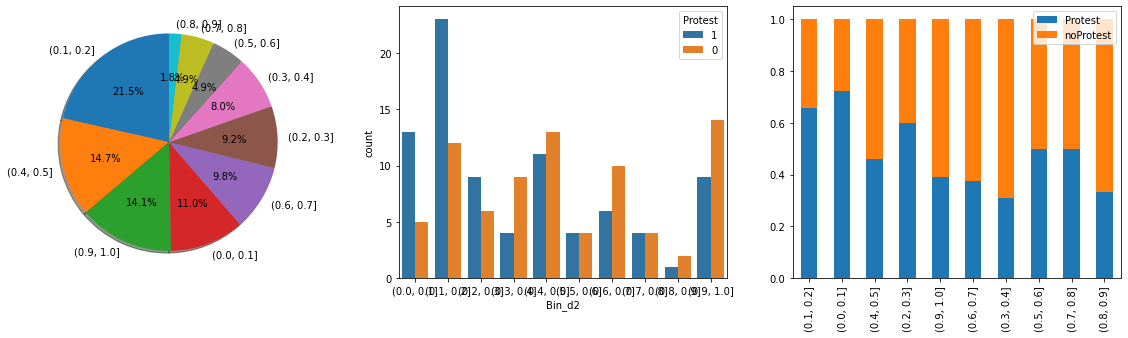

In [20]:
bins = np.linspace(0,1,11)
training['Bin_d2'] = pd.cut(training['d2'],bins)
charts('Bin_d2',training)


           ____________________________ Plots of Bin_d3 per Protest and noProtest: ____________________________


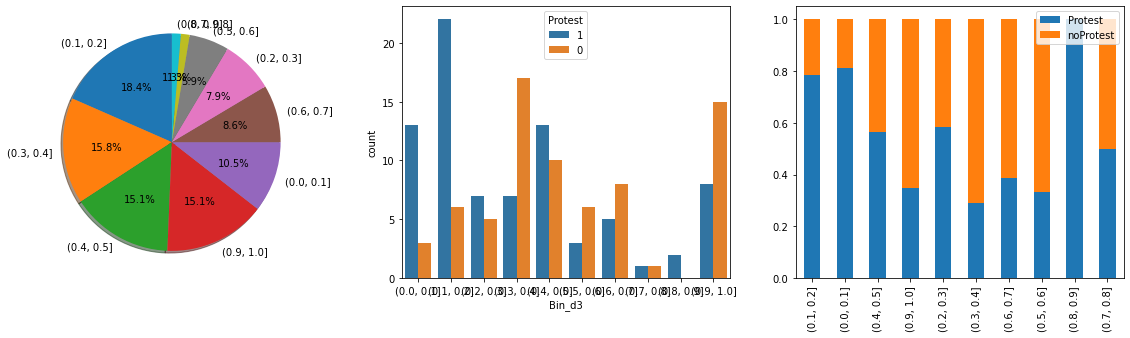

In [21]:
bins = np.linspace(0,1,11)
training['Bin_d3'] = pd.cut(training['d3'],bins)
charts('Bin_d3',training)


           ____________________________ Plots of Bin_d4 per Protest and noProtest: ____________________________


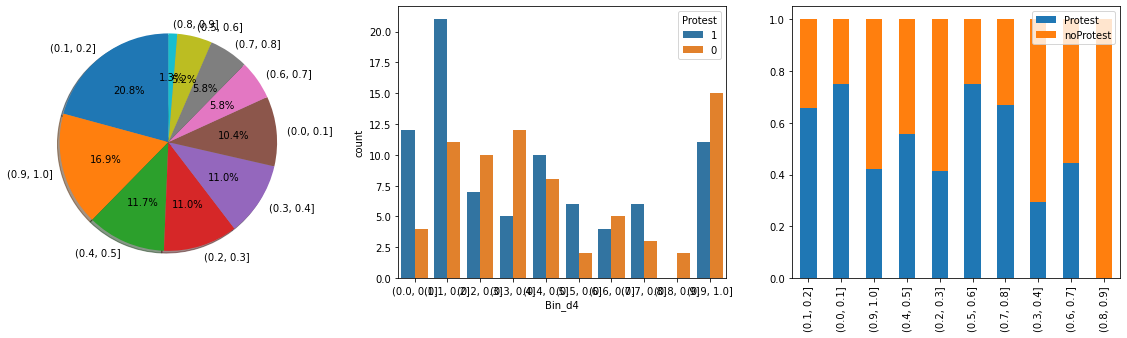

In [22]:
bins = np.linspace(0,1,11)
training['Bin_d4'] = pd.cut(training['d4'],bins)
charts('Bin_d4',training)


           ____________________________ Plots of Bin_d5 per Protest and noProtest: ____________________________


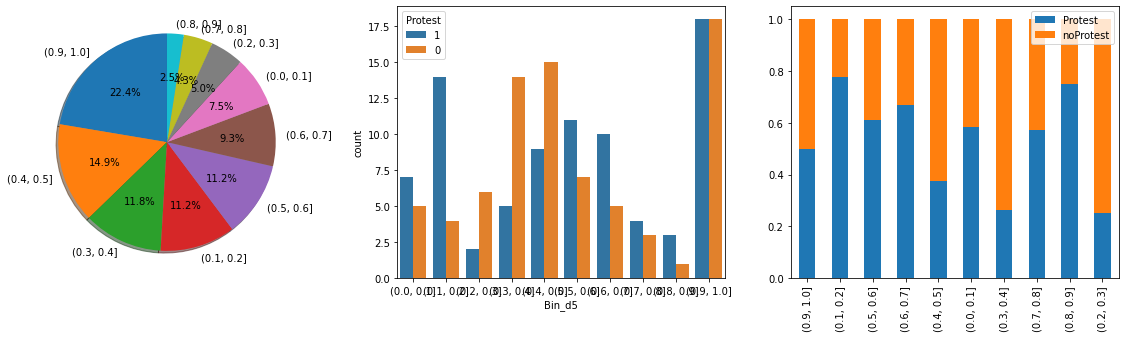

In [23]:
bins = np.linspace(0,1,11)
training['Bin_d5'] = pd.cut(training['d5'],bins)
charts('Bin_d5',training)


           ____________________________ Plots of Bin_d6 per Protest and noProtest: ____________________________


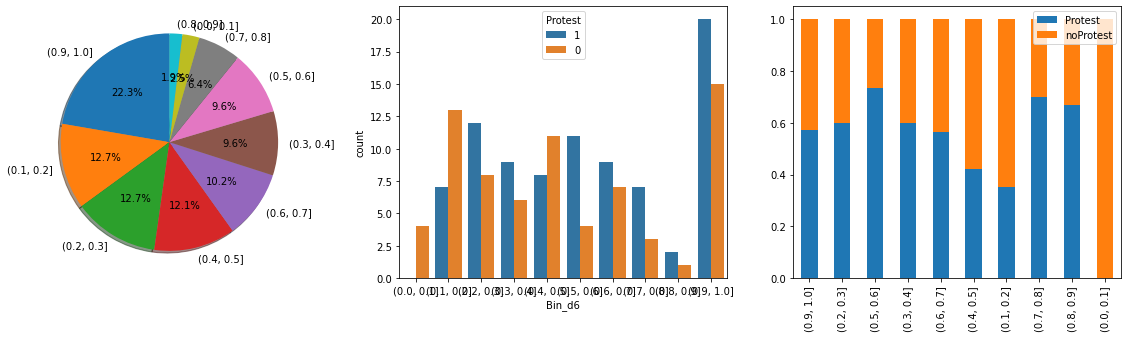

In [24]:
bins = np.linspace(0,1,11)
training['Bin_d6'] = pd.cut(training['d6'],bins)
charts('Bin_d6',training)


           ____________________________ Plots of Bin_d7 per Protest and noProtest: ____________________________


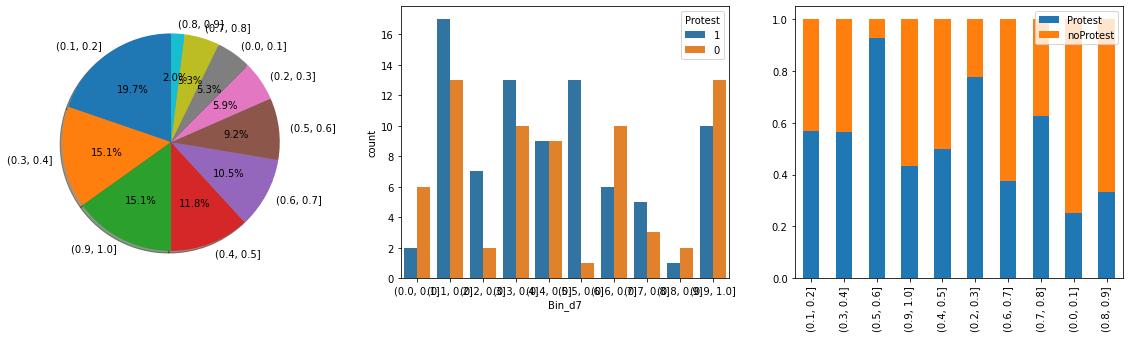

In [25]:
bins = np.linspace(0,1,11)
training['Bin_d7'] = pd.cut(training['d7'],bins)
charts('Bin_d7',training)


           ____________________________ Plots of Bin_d8 per Protest and noProtest: ____________________________


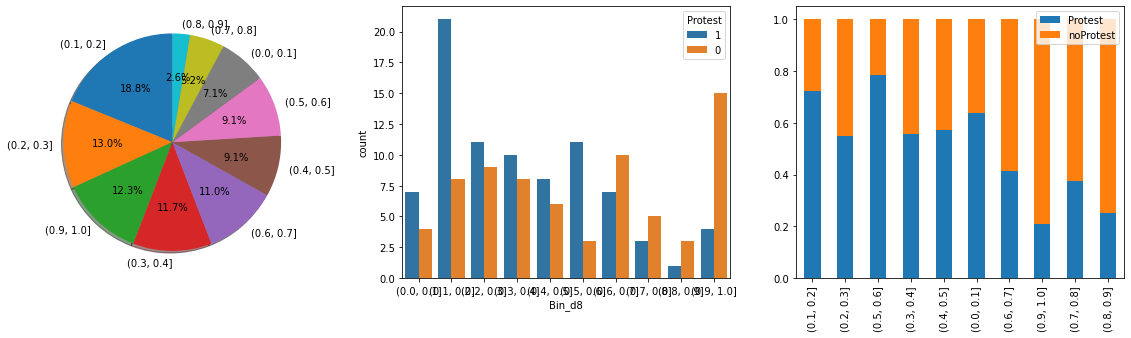

In [26]:
bins = np.linspace(0,1,11)
training['Bin_d8'] = pd.cut(training['d8'],bins)
charts('Bin_d8',training)


           ____________________________ Plots of Bin_d9 per Protest and noProtest: ____________________________


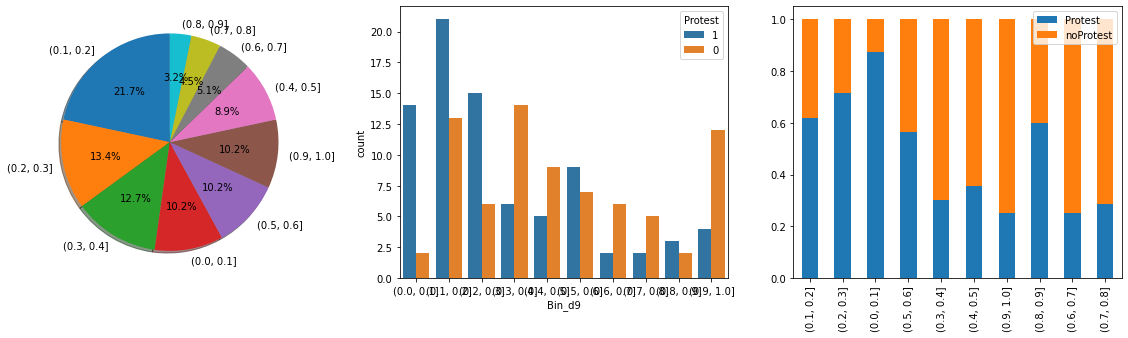

In [27]:
bins = np.linspace(0,1,11)
training['Bin_d9'] = pd.cut(training['d9'],bins)
charts('Bin_d9',training)


           ____________________________ Plots of Bin_d10 per Protest and noProtest: ____________________________


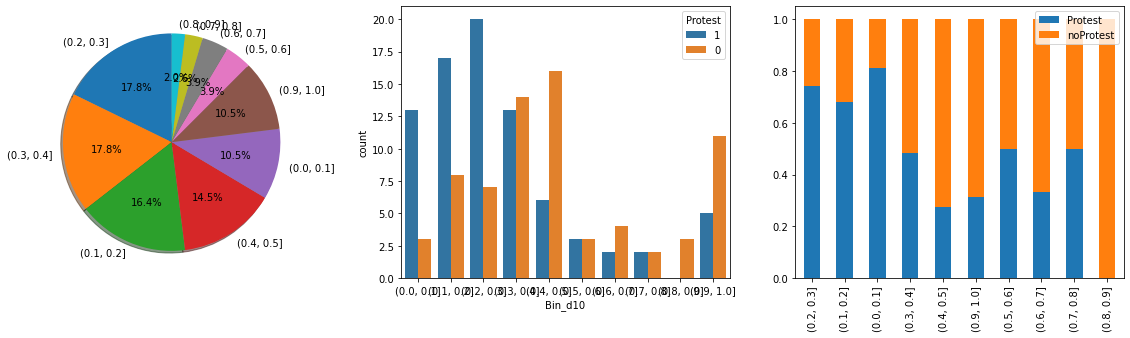

In [28]:
bins = np.linspace(0,1,11)
training['Bin_d10'] = pd.cut(training['d10'],bins)
charts('Bin_d10',training)

### Average
Average tweet rate per day over the period


           ____________________________ Plots of Bin_average per Protest and noProtest: ____________________________


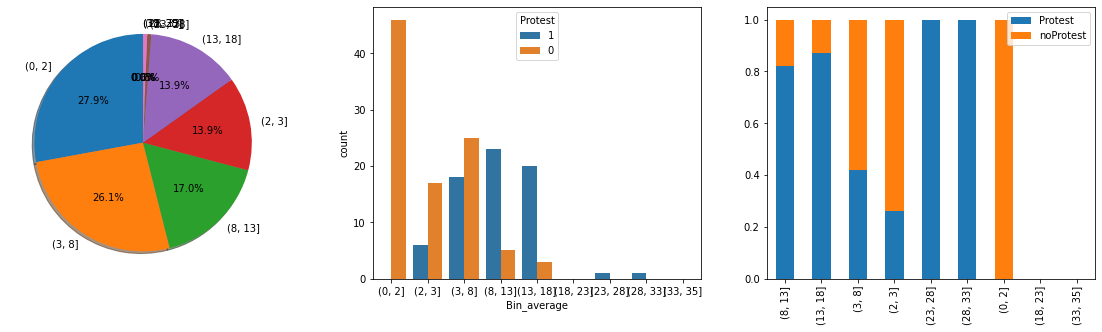

In [29]:
average = training["average"]
bins = [0,2]
for i in range(3,35,5):
    bins.append(i)
for i in range(35,int(max(average)+1),100):
    bins.append(i)
    
training['Bin_average'] = pd.cut(training['average'],bins)
charts('Bin_average',training)

### Sentiment

#### Subjectivity


           ____________________________ Plots of Bin_sub per Protest and noProtest: ____________________________


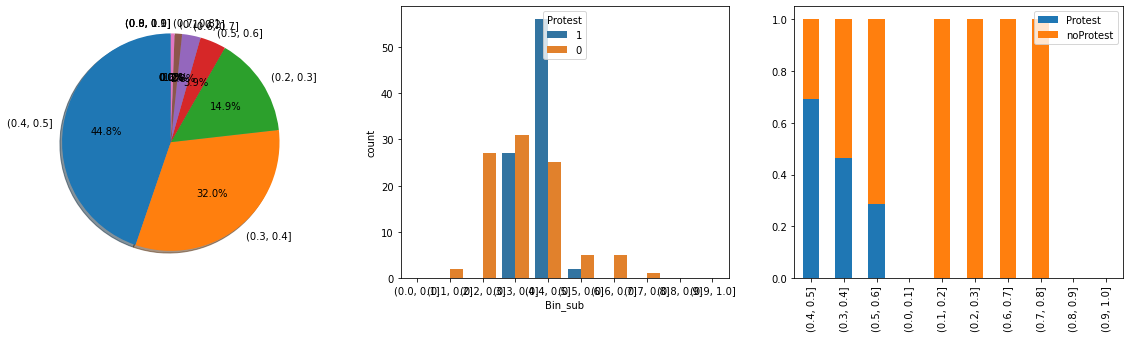

In [30]:
bins = np.linspace(0,1,11)
training['Bin_sub'] = pd.cut(training['sub'],bins)
charts('Bin_sub',training)

#### Polarity


           ____________________________ Plots of Bin_pol per Protest and noProtest: ____________________________


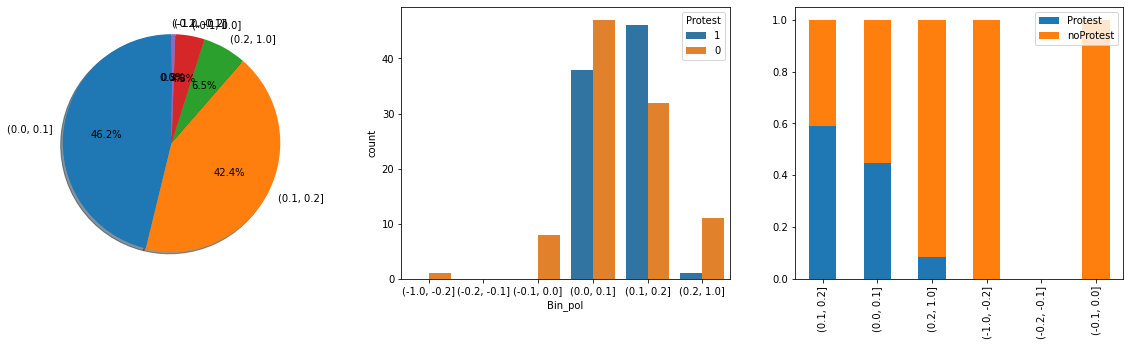

In [31]:
bins = [-1,-0.2,-0.1,0,0.1,0.2,1]
training['Bin_pol'] = pd.cut(training['pol'],bins)
charts('Bin_pol',training)

### Tweet MetaData


           ____________________________ Plots of Bin_retweets per Protest and noProtest: ____________________________


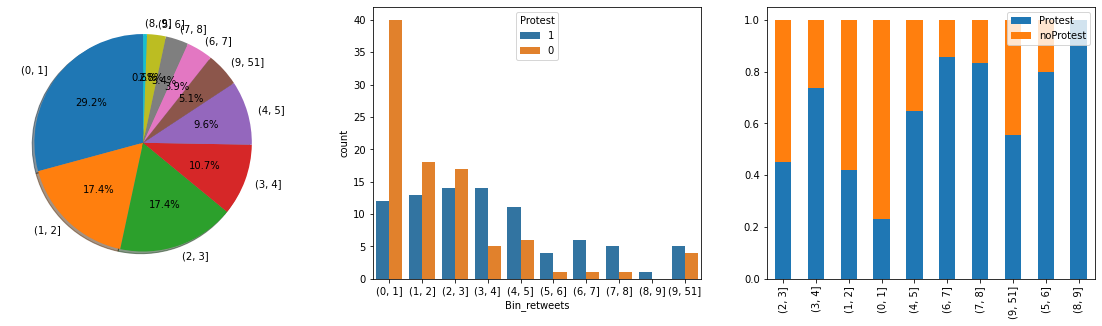

In [32]:
retweets = training['retweets']
bins = []
for i in range(0,10,1):
    bins.append(i)
bins.append(51)

training['Bin_retweets'] = pd.cut(training['retweets'],bins)
charts('Bin_retweets',training)


           ____________________________ Plots of Bin_likes per Protest and noProtest: ____________________________


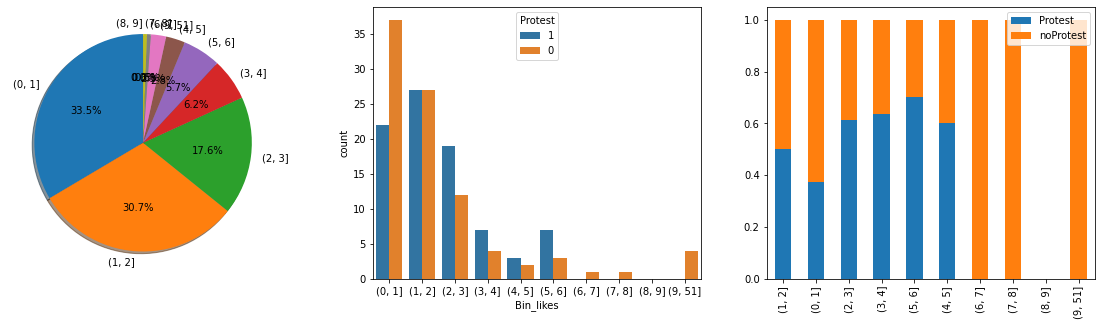

In [33]:
likes = training['likes']
bins = []
for i in range(0,10,1):
    bins.append(i)
bins.append(51)

training['Bin_likes'] = pd.cut(training['likes'],bins)
charts('Bin_likes',training)


           ____________________________ Plots of Bin_followers per Protest and noProtest: ____________________________


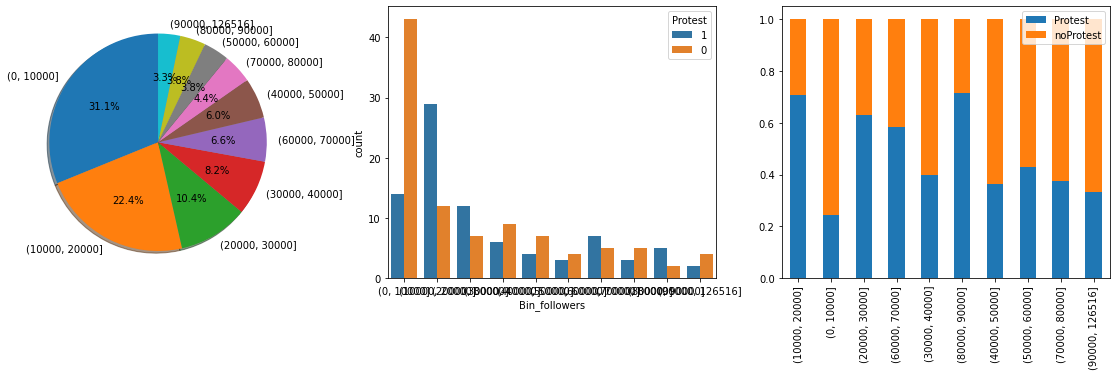

In [34]:
followers = training['followers']
bins = []
for i in range(0,100000,10000):
    bins.append(i)
bins.append(int(max(followers)))
training['Bin_followers'] = pd.cut(training['followers'],bins)
charts('Bin_followers',training)


           ____________________________ Plots of Bin_replies per Protest and noProtest: ____________________________


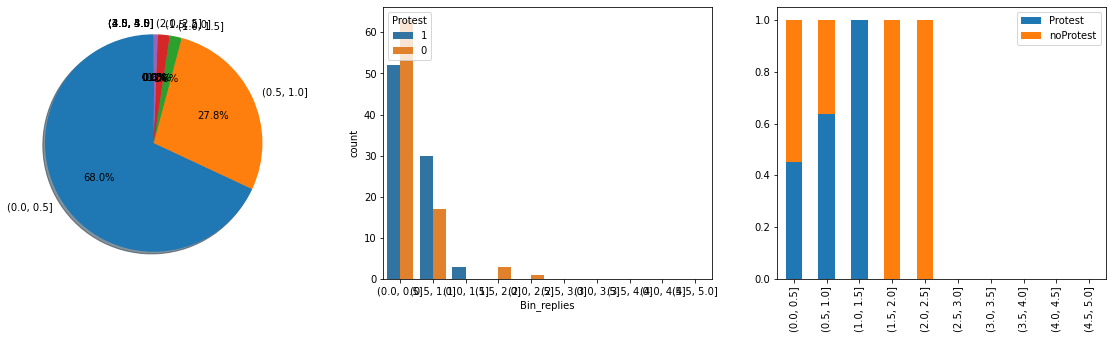

In [35]:
replies = training['replies']
bins = np.linspace(0,5,11)

training['Bin_replies'] = pd.cut(training['replies'],bins)
charts('Bin_replies',training)

In [36]:
graph = []
for iter, row in training.iterrows():
    tweet_week = [row['d1'],row['d2'],row['d3'],row['d4'],row['d5'],row['d6'],row['d7'],row['d8'],row['d9'],row['d10']]
    graph.append(tweet_week)
training['Graph'] = graph

In [37]:
training.head()

,Protest,NuTweets,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,average,likes,followers,retweets,replies,sub,pol,place,grievances,triggers,tactics,actors,locations,weapons,eventualities,curiosities,non_protests,universities,BinTweets,Bin_d1,Bin_d2,Bin_d3,Bin_d4,Bin_d5,Bin_d6,Bin_d7,Bin_d8,Bin_d9,Bin_d10,Bin_average,Bin_sub,Bin_pol,Bin_retweets,Bin_likes,Bin_followers,Bin_replies,Graph
0,1,55,0.142857,0.071429,0.071429,0.642857,0.857143,1.000000,0.428571,0.571429,0.142857,0.142857,5.7,0.563636,76095.436364,1.781818,0.236364,0.392344,0.136253,City of Cape Town,['Education'],"['Crime Event', 'Wage disputes', 'Working cond...","['Gathering', 'Disrupt']",['Political Party'],['Tertiary Edu'],[],[],['Special Keywords'],['Election campaigns'],['Stellenbosh University'],"(40, 60]","(0.1, 0.2]","(0.0, 0.1]","(0.0, 0.1]","(0.6, 0.7]","(0.8, 0.9]","(0.9, 1.0]","(0.4, 0.5]","(0.5, 0.6]","(0.1, 0.2]","(0.1, 0.2]","(3, 8]","(0.3, 0.4]","(0.1, 0.2]","(1, 2]","(0, 1]","(70000, 80000]","(0.0, 0.5]","[0.1428571428571428, 0.0714285714285714, 0.071..."
1,0,21,0.200000,1.000000,0.200000,0.000000,0.600000,0.400000,0.200000,0.600000,0.800000,0.400000,2.2,1.095238,16761.238095,0.761905,0.142857,0.326557,0.039928,Cape Winelands,['Labour related'],['Arrests'],['Gathering'],['Political Party'],"['School', 'Tertiary Edu', 'Informal area']",[],[],[],['Election campaigns'],['Stellenbosh University'],"(20, 40]","(0.1, 0.2]","(0.9, 1.0]","(0.1, 0.2]",NaN,"(0.5, 0.6]","(0.3, 0.4]","(0.1, 0.2]","(0.5, 0.6]","(0.7, 0.8]","(0.3, 0.4]","(2, 3]","(0.3, 0.4]","(0.0, 0.1]","(0, 1]","(1, 2]","(10000, 20000]","(0.0, 0.5]","[0.2, 1.0, 0.2, 0.0, 0.6, 0.4, 0.2, 0.6, 0.8, ..."
3,1,151,0.065217,0.543478,0.282609,0.239130,0.413043,0.239130,0.021739,0.065217,0.478261,1.000000,15.4,1.211921,6063.615894,1.966887,0.324503,0.453187,0.130672,City of Cape Town,['Education'],"['Court hearing', 'Arrests']",['Disrupt'],['Political Party'],['Tertiary Edu'],['Police weapons'],[],['Special Keywords'],['Election campaigns'],['Stellenbosh University'],"(140, 160]","(0.0, 0.1]","(0.5, 0.6]","(0.2, 0.3]","(0.2, 0.3]","(0.4, 0.5]","(0.2, 0.3]","(0.0, 0.1]","(0.0, 0.1]","(0.4, 0.5]","(0.9, 1.0]","(13, 18]","(0.4, 0.5]","(0.1, 0.2]","(1, 2]","(1, 2]","(0, 10000]","(0.0, 0.5]","[0.0652173913043478, 0.5434782608695652, 0.282..."
4,0,22,0.166667,0.166667,0.000000,0.833333,1.000000,0.333333,0.500000,0.500000,0.166667,0.166667,2.3,1.500000,75081.727273,0.590909,0.136364,0.263291,0.117900,City of Cape Town,['Education'],"['Utility connections', 'Working conditions']","['March', 'Gathering']",['Political Party'],['School'],[],[],['Special Keywords'],['Election campaigns'],['Stellenbosh University'],"(20, 40]","(0.1, 0.2]","(0.1, 0.2]",NaN,"(0.8, 0.9]","(0.9, 1.0]","(0.3, 0.4]","(0.4, 0.5]","(0.4, 0.5]","(0.1, 0.2]","(0.1, 0.2]","(2, 3]","(0.2, 0.3]","(0.1, 0.2]","(0, 1]","(1, 2]","(70000, 80000]","(0.0, 0.5]","[0.1666666666666666, 0.1666666666666666, 0.0, ..."
5,1,158,0.021739,0.065217,0.478261,1.000000,0.500000,0.521739,0.347826,0.195652,0.043478,0.282609,15.9,0.670886,11773.183544,0.968354,0.284810,0.474581,0.135721,City of Cape Town,['Education'],['Court hearing'],['Gathering'],['Political Party'],['Tertiary Edu'],"['Crowd weapons', 'Police weapons']",['Police attack'],['Special Keywords'],['Election campaigns'],['Stellenbosh University'],"(140, 160]","(0.0, 0.1]","(0.0, 0.1]","(0.4, 0.5]","(0.9, 1.0]","(0.4, 0.5]","(0.5, 0.6]","(0.3, 0.4]","(0.1, 0.2]","(0.0, 0.1]","(0.2, 0.3]","(13, 18]","(0.4, 0.5]","(0.1, 0.2]","(0, 1]","(0, 1]","(10000, 20000]","(0.0, 0.5]","[0.0217391304347826, 0.0652173913043478, 0.478..."


In [38]:
non_protest_graph = []
protest_graph = []
for i in range(1,11):
    mean = (training.groupby('Protest')['d'+str(i)].mean())
    non_protest_graph.append(mean[0])
    protest_graph.append(mean[1])

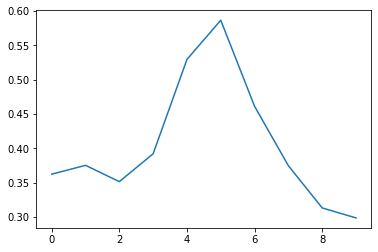

In [39]:
plt.plot(protest_graph)

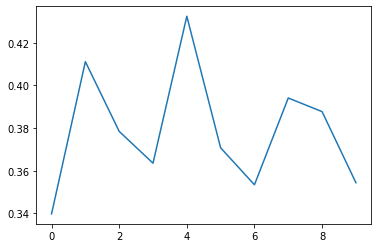

In [40]:
plt.plot(non_protest_graph)

In [41]:
graph = []
for iter, row in training.iterrows():
    tweet_week = [row['d1'],row['d2'],row['d3'],row['d4'],row['d5'],row['d6'],row['d7'],row['d8'],row['d9'],row['d10']]
    graph.append(tweet_week)
training['Graph'] = graph

In [42]:
def sum_lists(list_a, list_b):
    for i in range(0,len(list_a)):
        list_a[i] += list_b[i]
    return list_a

In [43]:
def get_max_day_mean(day,prot_bool):
    mean = [0,0,0,0,0,0,0,0,0,0]
    count = 0
    for iter, row in training.iterrows():
        if row['Protest'] == prot_bool:
            if row['Graph'].index(max(row['Graph'])) == (day-1):
                mean = sum_lists(mean, row['Graph'])
                count += 1
    mean_d = [x/count for x in mean ]
    return mean_d

<function matplotlib.pyplot.show(close=None, block=None)>

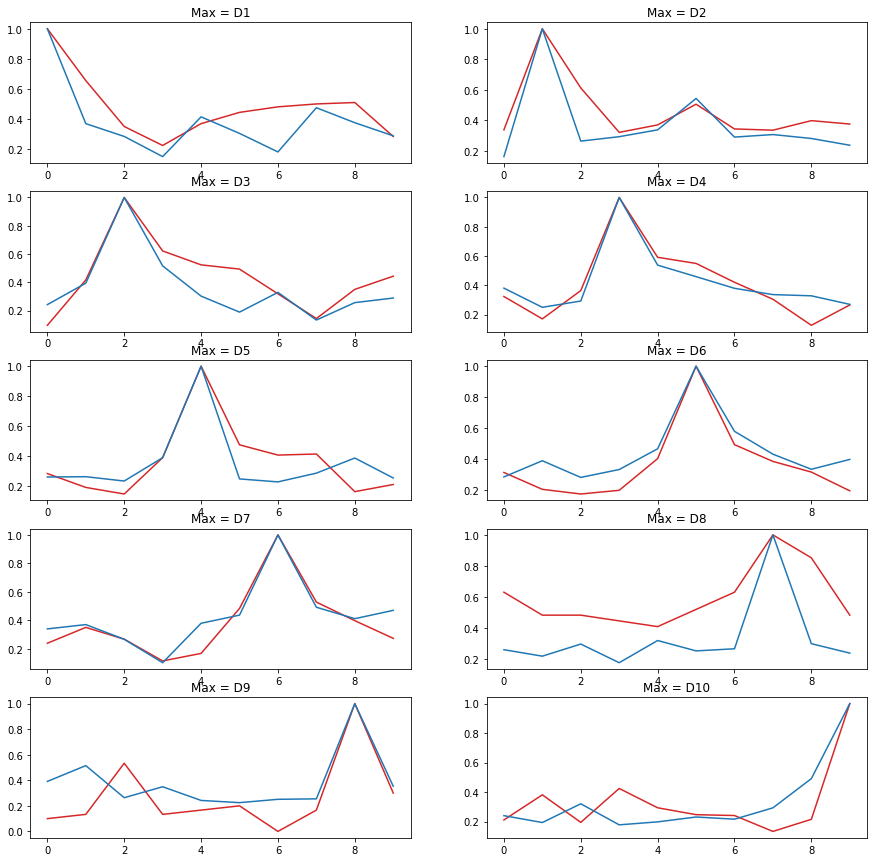

In [44]:
prot = 1
fig, axs = plt.subplots(5, 2)
axs[0, 0].plot(get_max_day_mean(1,prot), 'tab:red')
axs[0, 0].plot(get_max_day_mean(1,0), 'tab:blue')
axs[0, 0].set_title('Max = D1')
axs[0, 1].plot(get_max_day_mean(2,prot), 'tab:red')
axs[0, 1].plot(get_max_day_mean(2,0), 'tab:blue')
axs[0, 1].set_title('Max = D2')
axs[1, 0].plot(get_max_day_mean(3,prot), 'tab:red')
axs[1, 0].plot(get_max_day_mean(3,0), 'tab:blue')
axs[1, 0].set_title('Max = D3')
axs[1, 1].plot(get_max_day_mean(4,prot), 'tab:red')
axs[1, 1].plot(get_max_day_mean(4,0), 'tab:blue')
axs[1, 1].set_title('Max = D4')
axs[2, 0].plot(get_max_day_mean(5,prot), 'tab:red')
axs[2, 0].plot(get_max_day_mean(5,0), 'tab:blue')
axs[2, 0].set_title('Max = D5')
axs[2, 1].plot(get_max_day_mean(6,prot), 'tab:red')
axs[2, 1].plot(get_max_day_mean(6,0), 'tab:blue')
axs[2, 1].set_title('Max = D6')
axs[3, 0].plot(get_max_day_mean(7,prot), 'tab:red')
axs[3, 0].plot(get_max_day_mean(7,0), 'tab:blue')
axs[3, 0].set_title('Max = D7')
axs[3, 1].plot(get_max_day_mean(8,prot), 'tab:red')
axs[3, 1].plot(get_max_day_mean(8,0), 'tab:blue')
axs[3, 1].set_title('Max = D8')
axs[4, 0].plot(get_max_day_mean(9,prot), 'tab:red')
axs[4, 0].plot(get_max_day_mean(9,0), 'tab:blue')
axs[4, 0].set_title('Max = D9')
axs[4, 1].plot(get_max_day_mean(10,prot), 'tab:red')
axs[4, 1].plot(get_max_day_mean(10,0), 'tab:blue')
axs[4, 1].set_title('Max = D10')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show